# Projet 1, academy

In [128]:
# Importation des librairies

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn.preprocessing import StandardScaler
from math import pi

# Versions 
print('Version des librairies utilisées :')
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Seaborn       : ' + sns.__version__)
print('Sklearn       : ' + sklearn.__version__)
print('Missingno     : ' + msno.__version__)


sns.set()
%matplotlib inline

Version des librairies utilisées :
NumPy         : 1.19.2
Pandas        : 1.1.3
Seaborn       : 0.11.0
Sklearn       : 0.23.2
Missingno     : 0.4.2


In [2]:
# Importation des données

data = pd.read_csv("EdStatsData.csv")
dataCountry = pd.read_csv('EdStatsCountry.csv')
dataFootNote = pd.read_csv('EdStatsFootNote.csv')
dataSeries = pd.read_csv('EdStatsSeries.csv')
dataCountrySeries = pd.read_csv("EdStatsCountry-Series.csv")

# Analyse du fichier EdStatsCountry.csv

In [3]:
# Contenu des premières lignes
dataCountry.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
# Nom des colonnes
for col in dataCountry.columns:
    print(col)

Country Code
Short Name
Table Name
Long Name
2-alpha code
Currency Unit
Special Notes
Region
Income Group
WB-2 code
National accounts base year
National accounts reference year
SNA price valuation
Lending category
Other groups
System of National Accounts
Alternative conversion factor
PPP survey year
Balance of Payments Manual in use
External debt Reporting status
System of trade
Government Accounting concept
IMF data dissemination standard
Latest population census
Latest household survey
Source of most recent Income and expenditure data
Vital registration complete
Latest agricultural census
Latest industrial data
Latest trade data
Latest water withdrawal data
Unnamed: 31


In [5]:
# Données quanti
dataCountry.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [6]:
# Données quali
dataCountry.describe(exclude=[np.number])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,...,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,...,3,2,2,2,27,60,75,2,35,20
top,BDI,Paraguay,Paraguay,Low & middle income,ZQ,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,ZQ,...,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,...,107,106,95,110,59,10,15,110,36,40


In [7]:
print(dataCountry.shape)
# Il y a 241 lignes et 32 colonnes

(241, 32)


<AxesSubplot:>

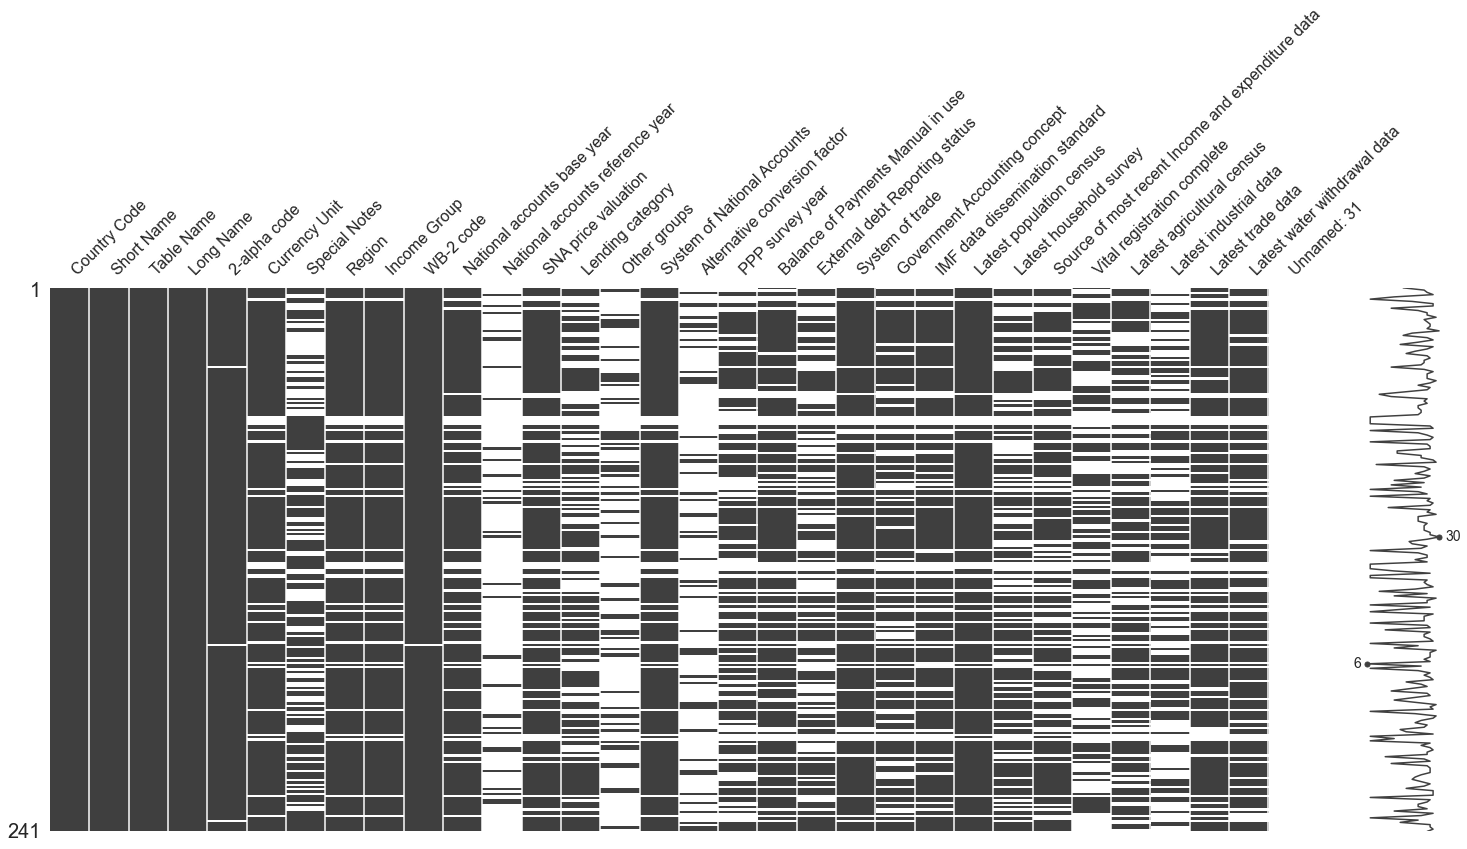

In [8]:
# Visualisation remplissage des données par colonnes
msno.matrix(dataCountry)

In [9]:
# Number of missing data points per column
missing_values_count = dataCountry.isnull().sum()

# How many total missing values do we have ?
total_cells = np.product(dataCountry.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("On observe", total_cells, "cellules dont", total_missing, "cellules vides. Il manque:", percent_missing, "% des données. ")

On observe 7712 cellules dont 2354 cellules vides. Il manque: 30.52385892116183 % des données. 


In [10]:
# Looking what are the categories in Income Group and Region
for each in dataCountry['Income Group'].unique():
    print(each)

print("------")
for each in dataCountry['Region'].unique():
    print(each)

High income: nonOECD
Low income
Upper middle income
nan
Lower middle income
High income: OECD
------
Latin America & Caribbean
South Asia
Sub-Saharan Africa
Europe & Central Asia
nan
Middle East & North Africa
East Asia & Pacific
North America


C:\Users\Pouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par région')

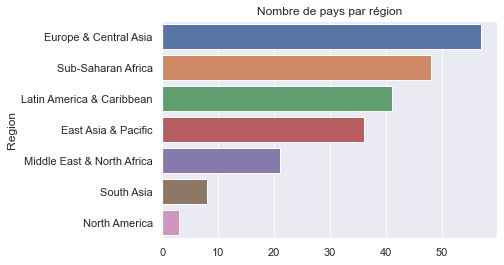

In [11]:
# Graphique des pays par région
number_country_region = dataCountry.groupby("Region").size().sort_values(ascending=False)
sns.barplot(number_country_region.values, number_country_region.index, data=dataCountry)
plt.title("Nombre de pays par région")

C:\Users\Pouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par Income Group')

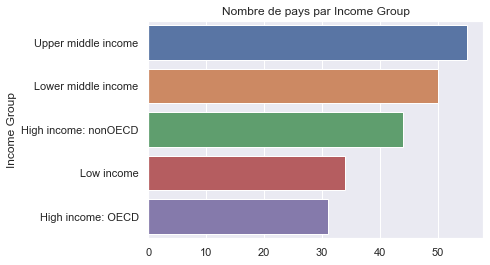

In [12]:
# Graphique des pays par Income Group
number_country_income = dataCountry.groupby("Income Group").size().sort_values(ascending=False)
sns.barplot(number_country_income.values, number_country_income.index, data=dataCountry)
plt.title("Nombre de pays par Income Group")

Text(0.5, 1.0, 'Groupe de revenu par région')

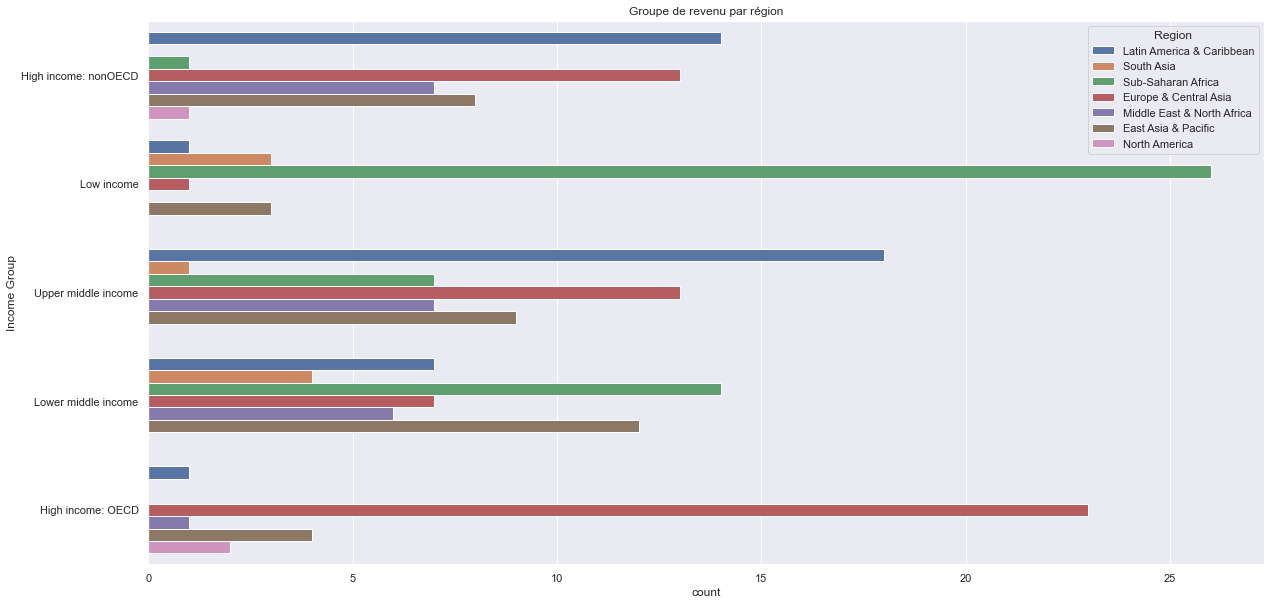

In [13]:
# Graphique des groupes de revenu par région

# Draw a nested barplot by species and sex
sns.set(rc={'figure.figsize':(20, 10)})
sns.countplot(y='Income Group', hue='Region', data=dataCountry)

plt.title("Groupe de revenu par région")

# Résultat d'analyse du fichier EdStatsCountry.csv:

Le fichier comporte 241 lignes et 32 colonnes.
On observe 7712 cellules dont 2354 cellules vides. Il manque donc 30.52% des données et il y'a une colonne remplie de données vide qui sera à nettoyer en cas d'usage de ce fichier.

Le fichier nous donne des informations sur la localisation des pays et sur leur situation économique ainsi que sur la date des dernières études. Cela nous permet donc de les classer par revenus et par localité.


# Analyse du fichier EdStatsCountry-Series.csv

In [14]:
# Contenu des premières lignes
dataCountrySeries.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [15]:
# Nom des colonnes
for col in dataCountrySeries.columns:
    print(col)

CountryCode
SeriesCode
DESCRIPTION
Unnamed: 3


In [16]:
# Données quanti
dataCountrySeries.describe()

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [17]:
# Données quali
dataCountrySeries.describe(exclude=[np.number])

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


In [18]:
dataCountrySeries.shape
# Il y a 613 lignes et 4 colonnes

(613, 4)

<AxesSubplot:>

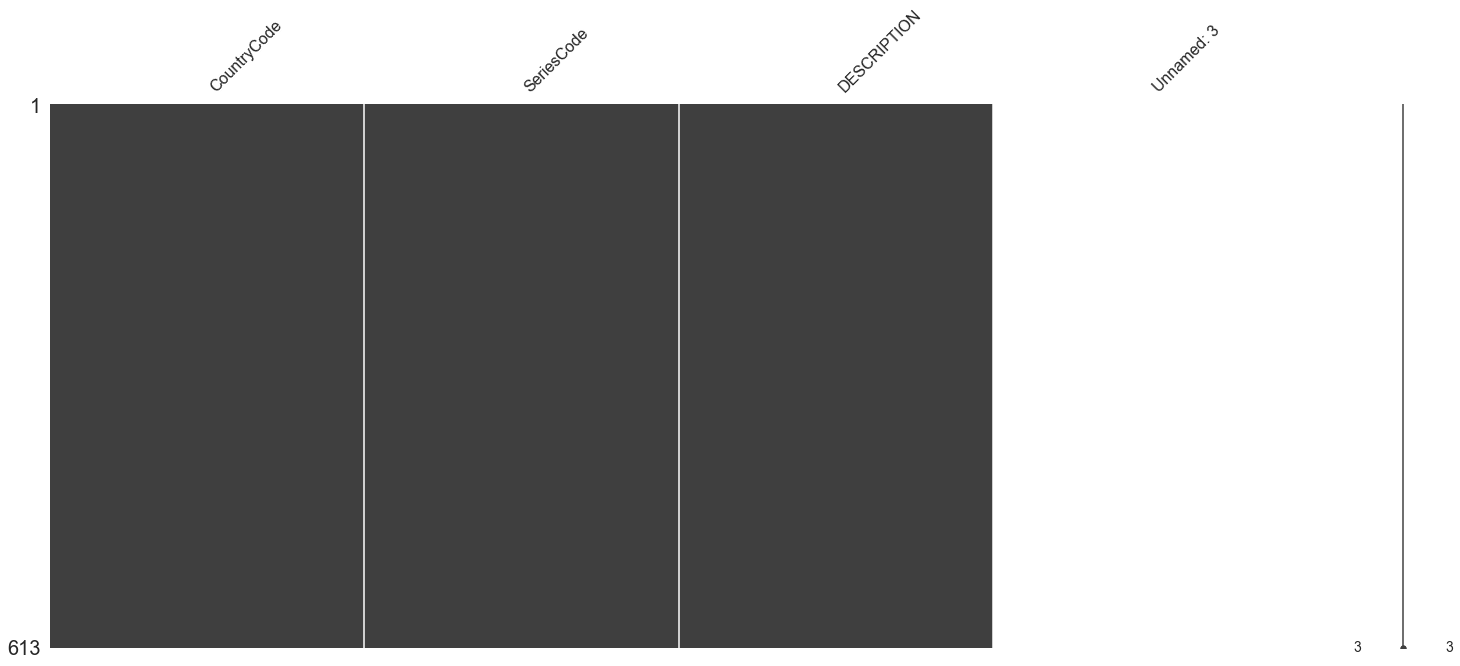

In [19]:
# Visualisation remplissage des données par colonnes
msno.matrix(dataCountrySeries)

In [20]:
# Number of missing data points per column
missing_values_count = dataCountrySeries.isnull().sum()

# How many total missing values do we have ?
total_cells = np.product(dataCountrySeries.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("On observe", total_cells, "cellules dont", total_missing, "cellules vides. Il manque:", percent_missing, "% des données. ")

On observe 2452 cellules dont 613 cellules vides. Il manque: 25.0 % des données. 


In [21]:
# On essaye de mettre en relation la colonne CountryCode de ce fichier avec celle du fichier EdStatsCountry
country_code_not_in_both = []

for each in dataCountry["Country Code"].unique():
    if each not in dataCountrySeries["CountryCode"].unique():
        country_code_not_in_both.append(each)
        
print(country_code_not_in_both)

['ARB', 'CUW', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'MAF', 'MEA', 'MIC', 'MNA', 'NAC', 'NRU', 'OED', 'SAS', 'SSA', 'SSD', 'SSF', 'SXM', 'UMC', 'WLD']


In [22]:
# Indicateurs dans la colonne SeriesCode
for each in dataCountrySeries["SeriesCode"].unique():
    print(each)

SP.POP.TOTL
SP.POP.GROW
NY.GDP.PCAP.PP.CD
NY.GDP.MKTP.PP.KD
NY.GNP.MKTP.PP.CD
NY.GDP.MKTP.PP.CD
NY.GDP.PCAP.PP.KD
NY.GNP.PCAP.PP.CD
SP.POP.1564.TO.ZS
SP.POP.TOTL.MA.ZS
SP.POP.TOTL.FE.ZS
SP.POP.0014.TO.ZS
NY.GNP.PCAP.CD
NY.GDP.PCAP.CD
NY.GDP.PCAP.KD
SP.POP.1564.MA.IN
SP.POP.0014.TO
SP.POP.1564.TO
SP.POP.1564.FE.IN
SP.POP.0014.MA.IN
SP.POP.0014.FE.IN


C:\Users\Pouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Nombre de pays')

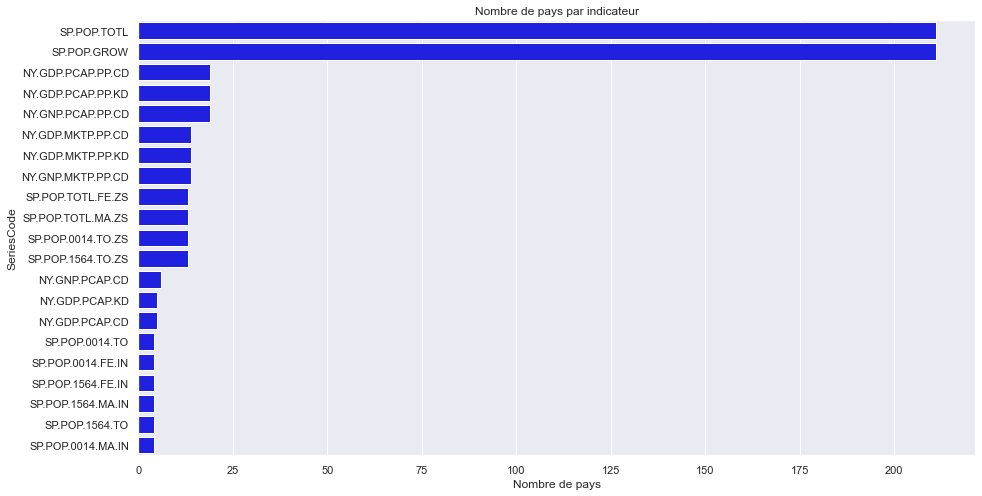

In [23]:
# Graphique du nombre de pays représente par indicateur
series_code_indic = dataCountrySeries.groupby("SeriesCode").size().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(series_code_indic.values, series_code_indic.index, color='blue')
plt.title("Nombre de pays par indicateur")
plt.xlabel("Nombre de pays")

In [24]:
# Descriptions de l'origine de la source, parfois avec la date.
for each in dataCountrySeries['DESCRIPTION'].unique():
    print(each)

Data sources : United Nations World Population Prospects
Data sources: United Nations World Population Prospects
Estimates are based on regression.
Data sources : Institute of Statistics, Eurostat
Data sources : Australian Bureau of Statistics
Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. 
Data sources: Australian Bureau of Statistics
Data sources : Eurostat
Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects
Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects
Data sources : National Statistical Committee of the Republic of Belarus
Data sources: National Statistical Committee of the Republic of Belarus
Data sources : Bermuda Government Department of Statistics
Data sources: Bermuda Government Department of Statistics
Data sources : Statistics Canada
Data sources: Statistics Canada
Refers to Guernsey, and Jersey.
Data sources : National 

# Résultat d'analyse du fichier EdStatsCountry-Series.csv:

Le fichier comporte 4 colonnes et 613 lignes. On peut y observer 2452 dont 613 cellules vides. Il manque 25% des données. Cependant tout les NaN sont présent dans la même colonne "unnamed: 3" qu'on devra donc nettoyer, les autres colonnes sont donc complètes.

Ces colonnes comportent des données sur le code du pays, et des descriptions de certains indicateurs présent dans le fichier EdStatsCountry. 

On remarque que les codes présent dans Country et pas dans Coutry-Series représentent principalement des groupe de pays comme l'Europe, Afrique sub-saharienne ou encore des groupes de revenus (Low Income, High Income). Il y a également des pays comme le Curaçao.

# Analyse du fichier EdStatsFootNote.csv

In [25]:
# Contenu des premières lignes
dataFootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [26]:
# Données quanti
dataFootNote.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [27]:
# Données quali
dataFootNote.describe(exclude=[np.number])

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


In [28]:
print(dataFootNote.shape)

(643638, 5)


<AxesSubplot:>

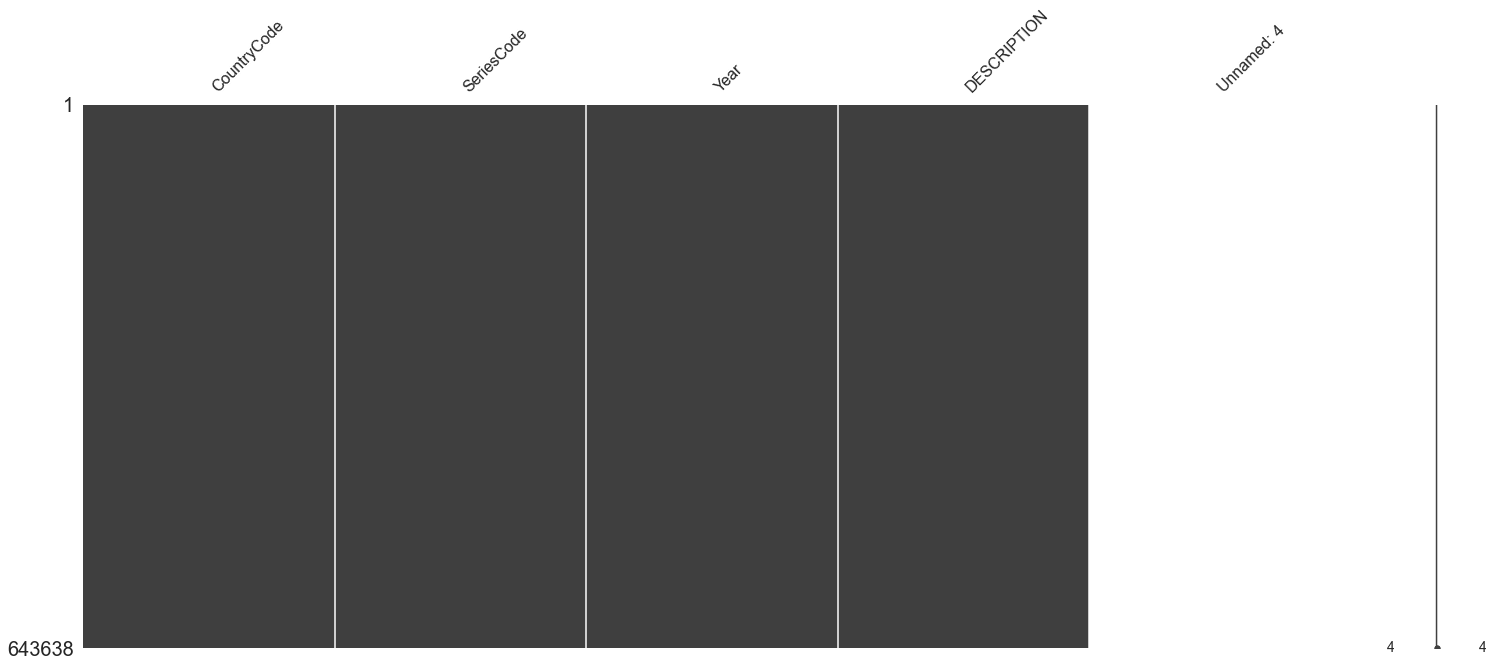

In [29]:
# Visualisation remplissage des données par colonnes
msno.matrix(dataFootNote)

In [30]:
# Number of missing data points per column
missing_values_count = dataFootNote.isnull().sum()

# How many total missing values do we have ?
total_cells = np.product(dataFootNote.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("On observe", total_cells, "cellules dont", total_missing, "cellules vides. Il manque:", percent_missing, "% des données. ")

On observe 3218190 cellules dont 643638 cellules vides. Il manque: 20.0 % des données. 


In [31]:
# On cherche les country code qui ne sont pas identiques à dataCountry et dataFootNote. 
country_code_not_in_both = []

for each in dataCountry["Country Code"].unique():
    if each not in dataFootNote["CountryCode"].unique():
        country_code_not_in_both.append(each)
        
print(country_code_not_in_both)

# Groenland, St Martin, Sint Maarten

['GRL', 'MAF', 'SXM']


In [32]:
# On cherche les country code qui ne sont pas identiques à dataCountrySeries et dataFootNote. 
country_code_not_in_both = []

for each in dataCountrySeries["CountryCode"].unique():
    if each not in dataFootNote["CountryCode"].unique():
        country_code_not_in_both.append(each)
        
print(country_code_not_in_both)

# Groenland

['GRL']


In [33]:
# Se rendre compte du contenu de Year
dataFootNote["Year"]

0         YR2001
1         YR2005
2         YR2000
3         YR2004
4         YR2006
           ...  
643633    YR2007
643634    YR2014
643635    YR2015
643636    YR2017
643637    YR2017
Name: Year, Length: 643638, dtype: object

In [34]:
# Tentative nettoyage des années de 'YR2000' à '2000'. Il faut chercher une solution moins lourde
clean_years = []
for row in dataFootNote["Year"]:
    clean_years.append(row)
print(clean_years)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:\Users\Pouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Année')

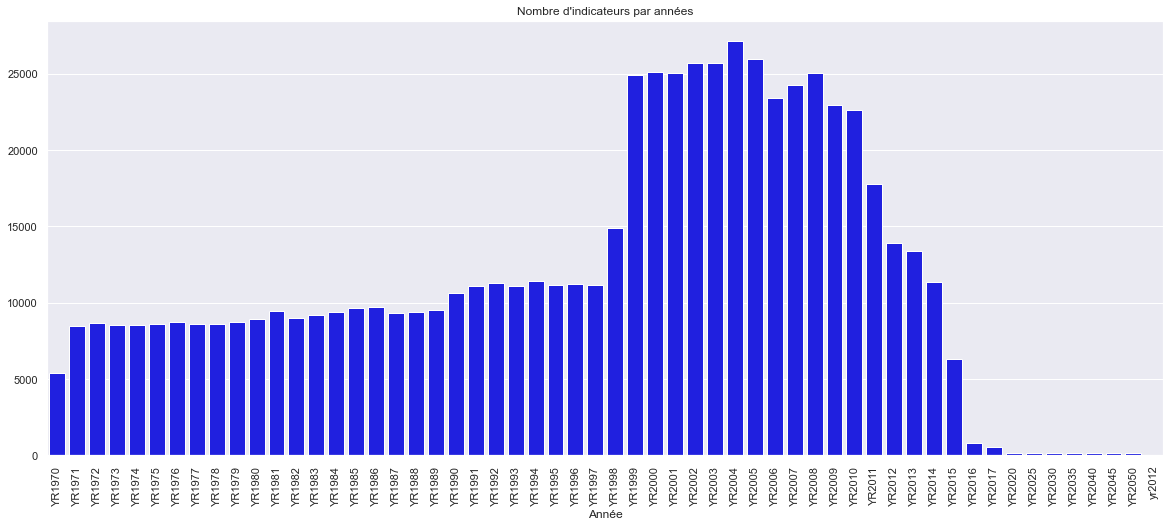

In [35]:
# Graphique du nombre d'indicateur mis à jour par année
year = dataFootNote.groupby("Year").size()
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(year.index, year.values, color='blue')
plt.title("Nombre d'indicateurs par années")
# Rotation légende des abscisses
plt.xticks( rotation=90)
plt.xlabel("Année")

# Résultat de l'analyse du fichier EdStatsFootNote.csv

Le fichier comporte 5 colonnes et 643638 lignes. On observe 3218190 cellules dont 643638 cellules vides. Il manque: 20% des données.
Cependant tout les NaN sont présent dans la même colonne "unnamed: 4" qu'on devra donc nettoyer si on se sert de ce jeu de données. Les autres colonnes sont complètes.

Le jeu de données nous indique les années où les indicateurs de chaque pays ont été mis à jour. On peut observer une forte hausse dès les années 2000 et une baisse après 2010.



# Analyse du fichier EdStatsSeries.csv

In [36]:
# Contenu des premières lignes
dataSeries.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Données quanti
dataSeries.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Données quali
dataSeries.describe(exclude=[np.number])

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,SE.PRM.ENRL.FE,Learning Outcomes,Barro-Lee: Average years of secondary schoolin...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,The criteria for people considered to be seeki...,Data up to 2016 are estimates while data from ...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


In [39]:
# Nom des colonnes
for col in dataSeries.columns:
    print(col)

Series Code
Topic
Indicator Name
Short definition
Long definition
Unit of measure
Periodicity
Base Period
Other notes
Aggregation method
Limitations and exceptions
Notes from original source
General comments
Source
Statistical concept and methodology
Development relevance
Related source links
Other web links
Related indicators
License Type
Unnamed: 20


In [40]:
print(dataSeries.shape)

(3665, 21)


<AxesSubplot:>

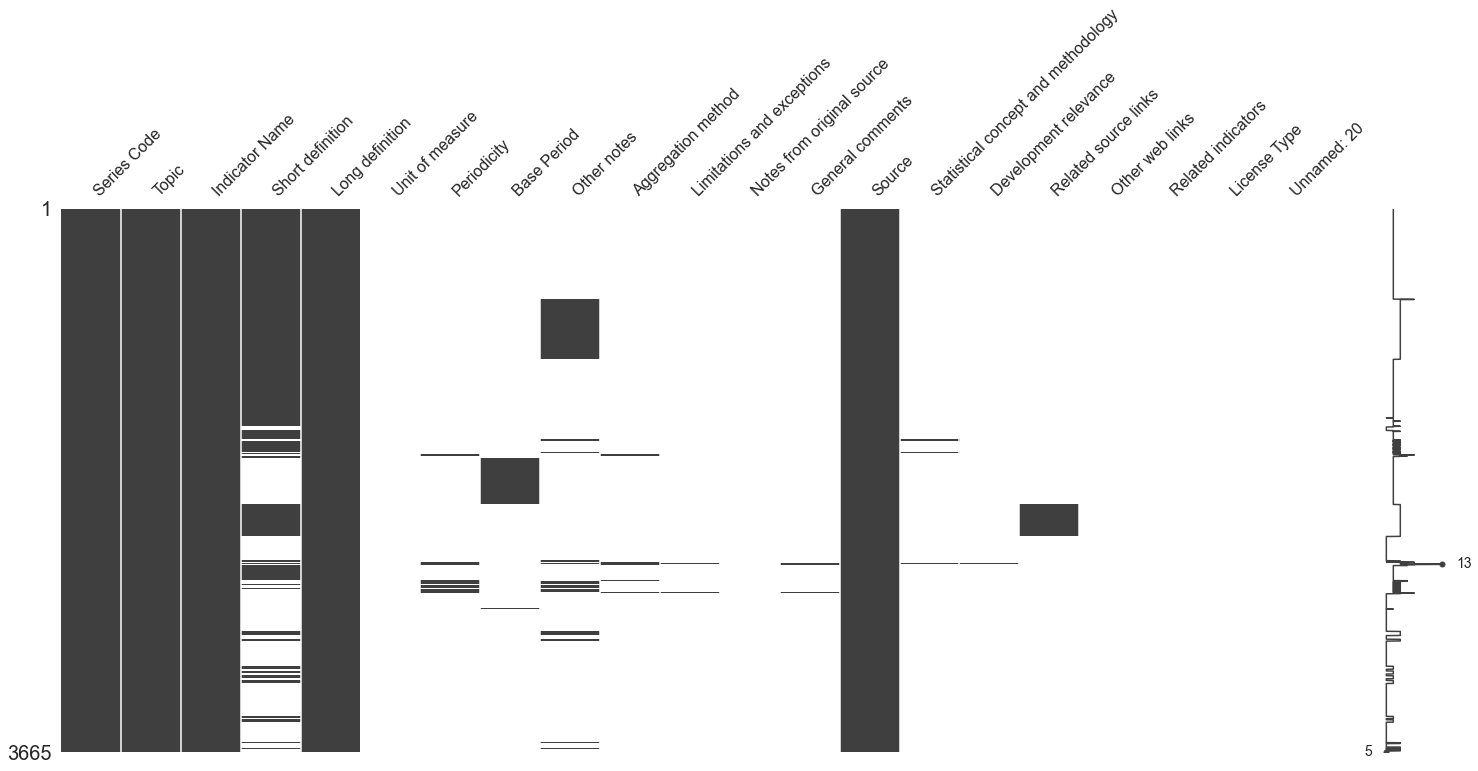

In [41]:
# Visualisation remplissage des données par colonnes
msno.matrix(dataSeries)

In [42]:
# Number of missing data points per column
missing_values_count = dataSeries.isnull().sum()

# How many total missing values do we have ?
total_cells = np.product(dataSeries.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("On observe", total_cells, "cellules dont", total_missing, "cellules vides. Il manque:", percent_missing, "% des données. ")

On observe 76965 cellules dont 55203 cellules vides. Il manque: 71.7248099785617 % des données. 


In [43]:
# Topic unique
topic_unique = []

for each in dataSeries["Topic"].unique():
    topic_unique.append(each)

print(topic_unique)

['Attainment', 'Education Equality', 'Infrastructure: Communications', 'Learning Outcomes', 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: Purchasing power parity', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Teachers', 'Education Management Information Systems (SABER)', 'Early Child Development (SABER)', 'Engaging the Private Sector (SABER)', 'School Health and School Feeding (SABER)', 'School Autonomy and Accountability (SABER)', 'School Finance (SABER)', 'Student Assessment (SABER)', 'Teachers (SABER)', 'Tertiary Education (SABER)', 'Workforce Development (SABER)', 'Literacy', 'Background', 'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education', 'Pre-Primary', 'Expenditures', 'Health: Risk factors', 'Health: Mortality', 'Social Protection & Labor: Labor force structure', 'Laber', 'So

C:\Users\Pouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, "nombre d'utilisation")

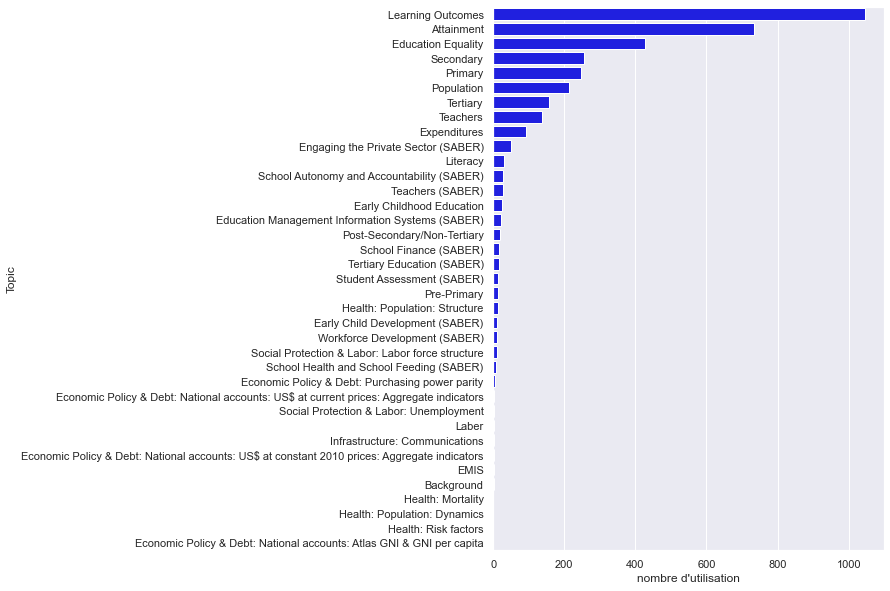

In [44]:
# Visualisation des topics par fréquence

topics = dataSeries.groupby("Topic").size().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(7,10)})
sns.barplot(topics.values, topics.index, color='blue')
plt.xlabel("nombre d'utilisation")

# Résultat de l'analyse du fichier EdStatsSeries.cv

Le fichier comporte 21 colonnes et 3606 lignes. On observe 76965 cellules dont 55203 cellules vides. Il manque 71.72% des données. 

Ce jeu de données comporte les sujets (topics) des indicateurs qui sont au nombre de 37. Ainsi que leurs définitions et leurs provenances (source). Ces colonnes sont intégralement remplies alors que les autres sont principalement ou complètement vides.

# Analyse du fichier EdStatsData.csv

In [45]:
# Contenu des premières lignes
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Données quanti
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [47]:
# Données quali
data.describe(exclude=[np.number])

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Kyrgyz Republic,TCD,"Adjusted net enrolment rate, primary, male (%)",SE.SEC.CMPT.LO.FE.ZS
freq,3665,3665,242,242


In [48]:
# Nombres de lignes et de colonnes
print(data.shape)

(886930, 70)


In [49]:
# Liste des indicateurs
indicators = data['Indicator Name'].unique()
for ind in indicators:
    print(ind)

Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, female (%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
Adjusted net enrolment rate, lower secondary, male (%)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, primary, male (%)
Adjusted net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, female (%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adul

SACMEQ: Female 6th grade students by reading proficiency level (%). Level 5 - Interpretive Reading
SACMEQ: Female 6th grade students by reading proficiency level (%). Level 6 - Inferential Reading
SACMEQ: Female 6th grade students by reading proficiency level (%). Level 7 - Analytical Reading
SACMEQ: Female 6th grade students by reading proficiency level (%). Level 8 - Critical Reading
SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 1 - Pre-Numeracy
SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 2 - Emergent Numeracy
SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 3 - Basic Numeracy
SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 4 - Beginning Numeracy
SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 5 - Competent Numeracy
SACMEQ: Male 6th grade students by mathematics proficiency level (%). Level 6 - Mathematically Skilled
SACMEQ: Male 6th grade s

<AxesSubplot:>

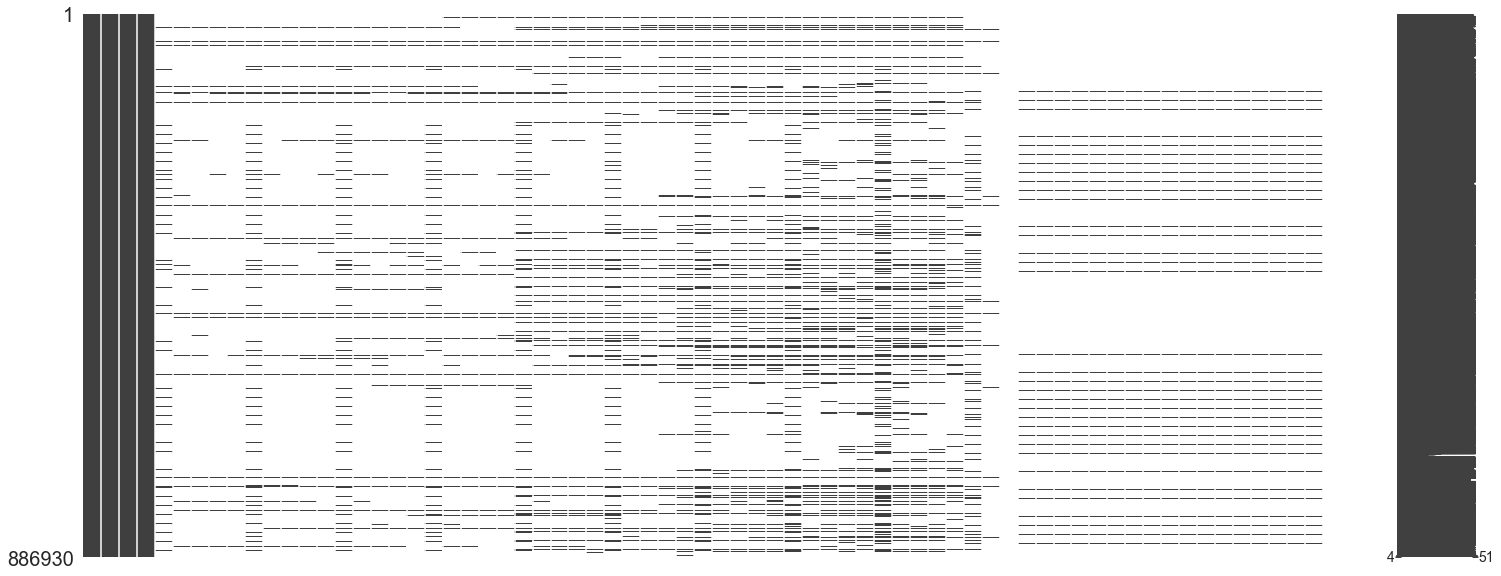

In [50]:
# Visualisation remplissage des données par colonnes
msno.matrix(data)

In [51]:
# Number of missing data points per column
missing_values_count = data.isnull().sum()

# How many total missing values do we have ?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("On observe", total_cells, "cellules dont", total_missing, "cellules vides. Il manque:", percent_missing, "% des données. ")

On observe 62085100 cellules dont 53455179 cellules vides. Il manque: 86.09985165522806 % des données. 


In [52]:
# Il y'a 241 Country Code unique à EdStatsCountry et 242 dans EdStatsData. On cherche donc la différence:

country_code_not_in_both = []

for each in data["Country Code"].unique():
    if each not in dataCountry["Country Code"].unique():
        country_code_not_in_both.append(each)
        
print(country_code_not_in_both)

# Le code du pays présent dans EdStatsData est VGB, ce qui correspond aux iles vierges britanniques.

['VGB']


In [53]:
# Il y'a 211 Country Code unique à EdStatsCountry-Series et 242 dans EdStatsData. On cherche donc la différence:

country_code_not_in_both = []

for each in data["Country Code"].unique():
    if each not in dataCountrySeries["CountryCode"].unique():
        country_code_not_in_both.append(each)
        
print(country_code_not_in_both)

# Les country code différents sont des groupements de pays par localité ou géographie (voir analyse dataCountrySeries)

['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'VGB', 'CUW', 'NRU', 'SXM', 'SSD', 'MAF']


C:\Users\Pouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de données par années')

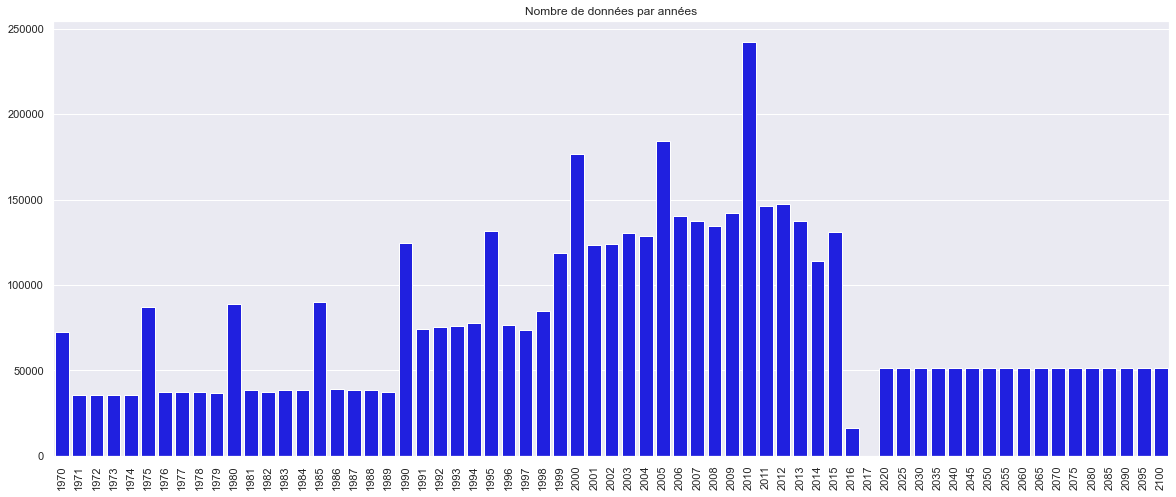

In [54]:
# Graphique du nombre de données disponibles par année
years = data.loc[:, "1970" : "2100"].notnull().sum()
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(years.index, years.values, color='blue')
plt.xticks(rotation=90)
plt.title("Nombre de données par années")

# Résultat d'analyse du fichier EdStatsData.csv

Le fichier comporte 70 colonnes et 886930 lignes. On observe 62085100 cellules dont 53455179 cellules vides. Il manque: 86.1% des données. .

Le jeu de données nous indique le nombre de données disponibles par années. On peut observer une forte hausse dès les années 1990, un fort pic en 2010 et que les données sont plus fortes tout les 5 ans. Il pourrait sembler pertinent de grouper les années par décennie mais presque aucune donnée n'est disponible pour l'année 2016, aucune pour l'année 2017 et le reste sont des données théoriques.

C'est le fichier qui semble le plus important pour notre analyse.

## Conclusion sur l'ensemble du jeu de données

Les fichiers les plus intéressants pour notre exploration de données sont EdStatsData.csv et EdStatsCountry.csv.
Cela car ils contiennent respectivement les valeurs quantitatives dont nous avons besoin et la possibilité de créer des groupes régionaux et monétaires.

# Sélection des indicateurs pertinents



Afin de trouver les indicateurs les plus intéressants, je me suis demandé les données que je cherchais. Il en est ressorti:
- Données démographiques, la population totale des pays.
- Données économique, le niveau de revenu du pays
- Le niveau d'éducation en secondaire et en universitaire
- L'accès à internet et à un ordinateur.
- La langue du pays

J'ai donc cherché des indicateurs avec des mots clés tels que "GPD", "Secondary", "Internet", "Population". Je n'ai pas trouvé d'indicateur linguistique.

In [55]:
# Liste des indicateurs envisagés
listIndic = ['Internet users (per 100 people)', 
             'Personal computers (per 100 people)',
             'GDP per capita (current US$)',
             'GDP per capita, PPP (current international $)',
             'GDP at market prices (current US$)',
             'Population, total',
             'Population growth (annual %)',
             'Population, ages 15-24, total',
             'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)',
             'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)',
             'DHS: Secondary completion rate',
             'Enrolment in upper secondary education, both sexes (number)',
             'Enrolment in tertiary education, all programmes, both sexes (number)',
             'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
             'DHS: Secondary completion rate',
             'Unemployment, total (% of total labor force)'                          
            ]

In [56]:
# Choix des années.
# J'ai choisi de conserver la dernière décennie avec les données remplies, donc 2006-2016 afin de travailler sur des données
# relativement récente et remplies

choosedYears = data.columns[40:-19].tolist()

In [57]:
data[choosedYears].head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN


In [58]:
# Ajout non propre de la colonne "indicator name"
choosedYears.insert(0,"Indicator Name")

In [59]:
# Création dataframe pour remplissage des indicateurs en % selon l'année

percentIndic = data[choosedYears].copy()
percentIndic = percentIndic.groupby("Indicator Name").agg(lambda s: s.notnull().mean().mul(100))
tempdf = []
for indic in listIndic:
    tempdf += [percentIndic.loc[indic]]
percentDf = pd.DataFrame(data=tempdf)  

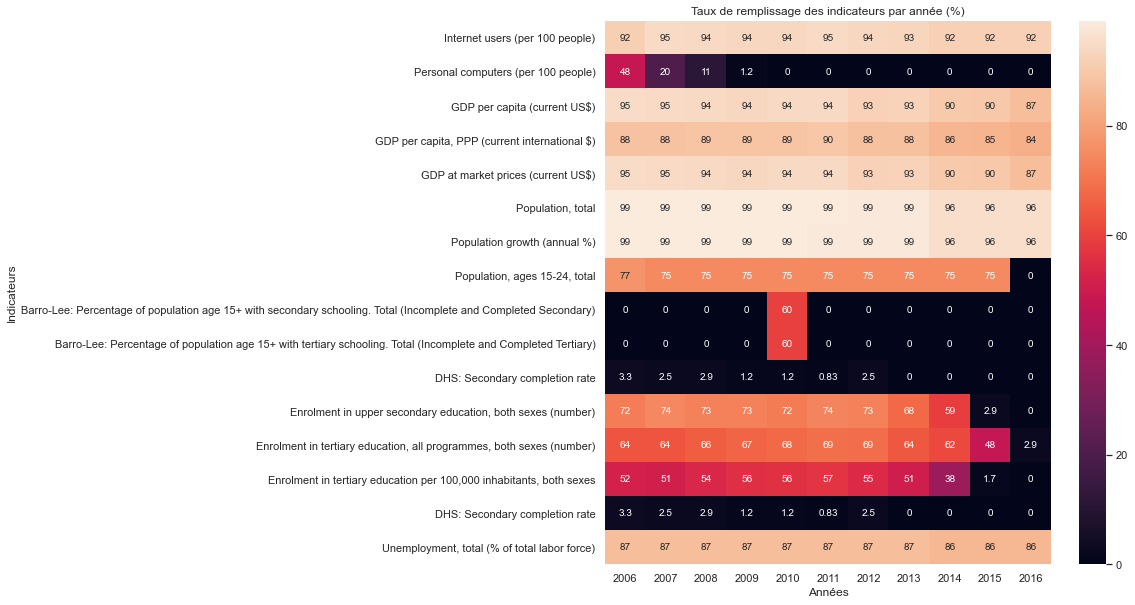

In [68]:
# Heatmap du % de remplissage des indicateurs pré-sélectionnés par année
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(percentDf, annot=True)
plt.title('Taux de remplissage des indicateurs par année (%)')
plt.xlabel('Années')
plt.ylabel('Indicateurs')
plt.show()

# Sauvegarde de ce tableau sous un format image
fig.savefig('heatmap.png')

L'indicateur numérique retenu sera donc "Internet users" car le second est peu rempli et n'a pas été mis à jour depuis 2008.

L'indicateur économique retenu sera "GDP per capita (current US$)" car il est plus rempli que son équivalent PPP (PIB en PPA).

Les indicateurs d'éducation retenus sont "Enrolment in upper secondary education, both sexes (number)" et "Enrolment in tertiary education, all programmes, both sexes (number)" car ils sont plus dotés que leurs concurrents. On pourrait se servir de "Barro-Lee" si on a besoin de pourcentages, mais on ne va pas le sélectionner dans un premier temps.

Au niveau démographique, les trois indicateurs sont corrects.

In [69]:
# List des indicateurs pouvant être utiles
goodIndicators = ['Internet users (per 100 people)', 
             'GDP per capita (current US$)',
             'Population, total',
             'Population growth (annual %)',
             'Population, ages 15-24, total',
             'Enrolment in upper secondary education, both sexes (number)',
             'Enrolment in tertiary education, all programmes, both sexes (number)',
             'Unemployment, total (% of total labor force)',                          
            ]

# Préparation du dataframe d'analyse

In [200]:
# Dataframe pour l'analyse des indicateurs
dfCountry = data.copy()
# On retire toutes les années qui ne nous intéressent pas
colsToRemove = data.columns[3:39].to_list()
colsToRemove.extend(data.columns[51:-1].to_list())
dfCountry.drop(columns = colsToRemove, inplace=True)

# permet de limiter le nombre de décimales à 2. Sinon pandas utilise la notation scientifique qui est peu lisible
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [201]:
# On retire la colonne "unnamed 69" qui est vide
dfCountry.drop(columns = "Unnamed: 69", inplace = True)
# On retire ensuite les indicateurs non choisis
dfCountry = dfCountry[dfCountry["Indicator Name"].isin(goodIndicators)]

In [202]:
dfCountry

,Country Name,Country Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",6899156.00,7214648.00,7588664.00,8006891.50,8382284.50,8715273.00,8594488.00,9147083.00,9688632.00,9966484.00,nan,nan
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",10739526.00,10700082.00,10374816.00,10302864.00,10178768.00,10644779.00,11620177.00,12027609.00,12021613.00,11995984.00,nan,nan
1245,Arab World,ARB,GDP per capita (current US$),3796.02,4414.09,5046.82,6255.76,5267.55,6032.96,7005.48,7571.40,7716.00,nan,nan,nan
1375,Arab World,ARB,Internet users (per 100 people),8.39,11.65,14.21,18.59,22.97,26.75,29.71,34.01,36.87,nan,nan,nan
2307,Arab World,ARB,Population growth (annual %),2.31,2.36,2.39,2.38,2.32,2.23,2.13,2.06,2.01,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884640,Zimbabwe,ZWE,Internet users (per 100 people),2.40,2.40,3.00,3.50,4.00,6.40,8.40,12.00,15.50,16.36,22.74,23.12
885572,Zimbabwe,ZWE,Population growth (annual %),1.26,1.41,1.55,1.70,1.84,1.98,2.11,2.23,2.31,2.34,2.35,2.34
885747,Zimbabwe,ZWE,"Population, ages 15-24, total",3266903.00,3309907.00,3342927.00,3366486.00,3381553.00,3389035.00,3389423.00,3383141.00,3371070.00,3354236.00,3333716.00,nan
885798,Zimbabwe,ZWE,"Population, total",12940032.00,13124267.00,13329909.00,13558469.00,13810599.00,14086317.00,14386649.00,14710826.00,15054506.00,15411675.00,15777451.00,16150362.00


In [203]:
# On drop les indicateurs qui sont totalement NaN pour un pays.
dfCountry.dropna(thresh = 4, inplace = True)

<AxesSubplot:>

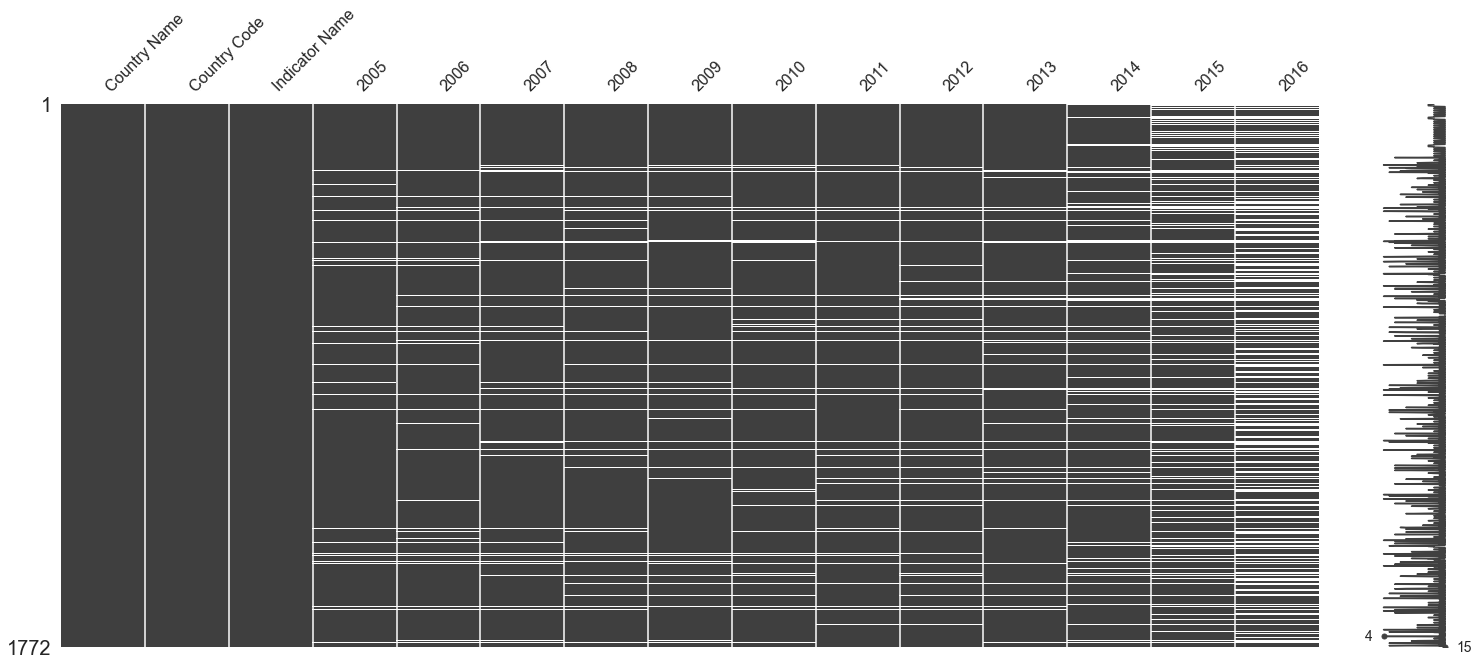

In [204]:
msno.matrix(dfCountry)

In [75]:
# Ajout des variables repérés plus tôt dans EdStatsCountry.csv: "Region" et "Income Group". Cela va nous permettre de les
# utiliser comme un talon démographique afin de faire des statistiques.
incomeCountries = pd.DataFrame({'Country Code': dataCountry['Country Code'].unique(),
                               'Region': dataCountry['Region'],
                               'Income Group': dataCountry['Income Group']})
# jointure par la clé Country Code, vers la gauche
dfCountry = pd.merge(dfCountry, incomeCountries, left_on="Country Code", right_on="Country Code", how='left')

In [76]:
# On voit qu'il existe encore du nan
dfCountry['Region'].unique()

array([nan, 'South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [77]:
# On retire les lignes qui ne sont pas des pays mais des groupes de pays ou des groupes de richesse.
# Après les avoir retiré, il nous reste Gibraltar, les British Virgin Islands et Nauru. Nous allons également les enlever
# de notre dataframe car c'est soit une région d'un autre pays, soit des pays avec moins de 30000 habitants.
removeNaRegion = dfCountry[dfCountry["Region"].isna()]     
countryNameToRemove = ['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands', 'Gibraltar', 'Nauru']
dfCountry = dfCountry[dfCountry["Country Name"].isin(countryNameToRemove) == False]

# Analyse

In [78]:
# J'ai choisi d'imputer les NaN de 2016 par la dernière valeur non nulle pour le pays (2006 maximum). On va donc conserver
# uniquement cette année que l'on va renommer "Last Data"


In [79]:
dfImputeYears = dfCountry.copy()
# On choisit les colonnes des années
cols=dfImputeYears.columns[3:-2].tolist()

In [80]:
dfYears = dfImputeYears[cols]
# Cette méthode impute automatiquement la donnée à la gauche d'une cellule vide. On a donc les dernières données connues
dfYears.fillna(method="ffill", axis=1, inplace=True)

C:\Users\Pouk\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [81]:
# On assigne la nouvelle colonne pleine
dfCountry["2016"] = dfYears["2016"]


In [82]:
dfCountry.rename(columns={'2016':"Last Data"}, inplace=True)
dfCountry.drop(dfCountry.columns[3:14], axis = 1, inplace=True)

In [83]:
dfCountry

,Country Name,Country Code,Indicator Name,Last Data,Region,Income Group
175,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",262874.00,South Asia,Low income
176,Afghanistan,AFG,"Enrolment in upper secondary education, both s...",968769.00,South Asia,Low income
177,Afghanistan,AFG,GDP per capita (current US$),561.78,South Asia,Low income
178,Afghanistan,AFG,Internet users (per 100 people),10.60,South Asia,Low income
179,Afghanistan,AFG,Population growth (annual %),2.69,South Asia,Low income
...,...,...,...,...,...,...
1767,Zimbabwe,ZWE,Internet users (per 100 people),23.12,Sub-Saharan Africa,Low income
1768,Zimbabwe,ZWE,Population growth (annual %),2.34,Sub-Saharan Africa,Low income
1769,Zimbabwe,ZWE,"Population, ages 15-24, total",3333716.00,Sub-Saharan Africa,Low income
1770,Zimbabwe,ZWE,"Population, total",16150362.00,Sub-Saharan Africa,Low income


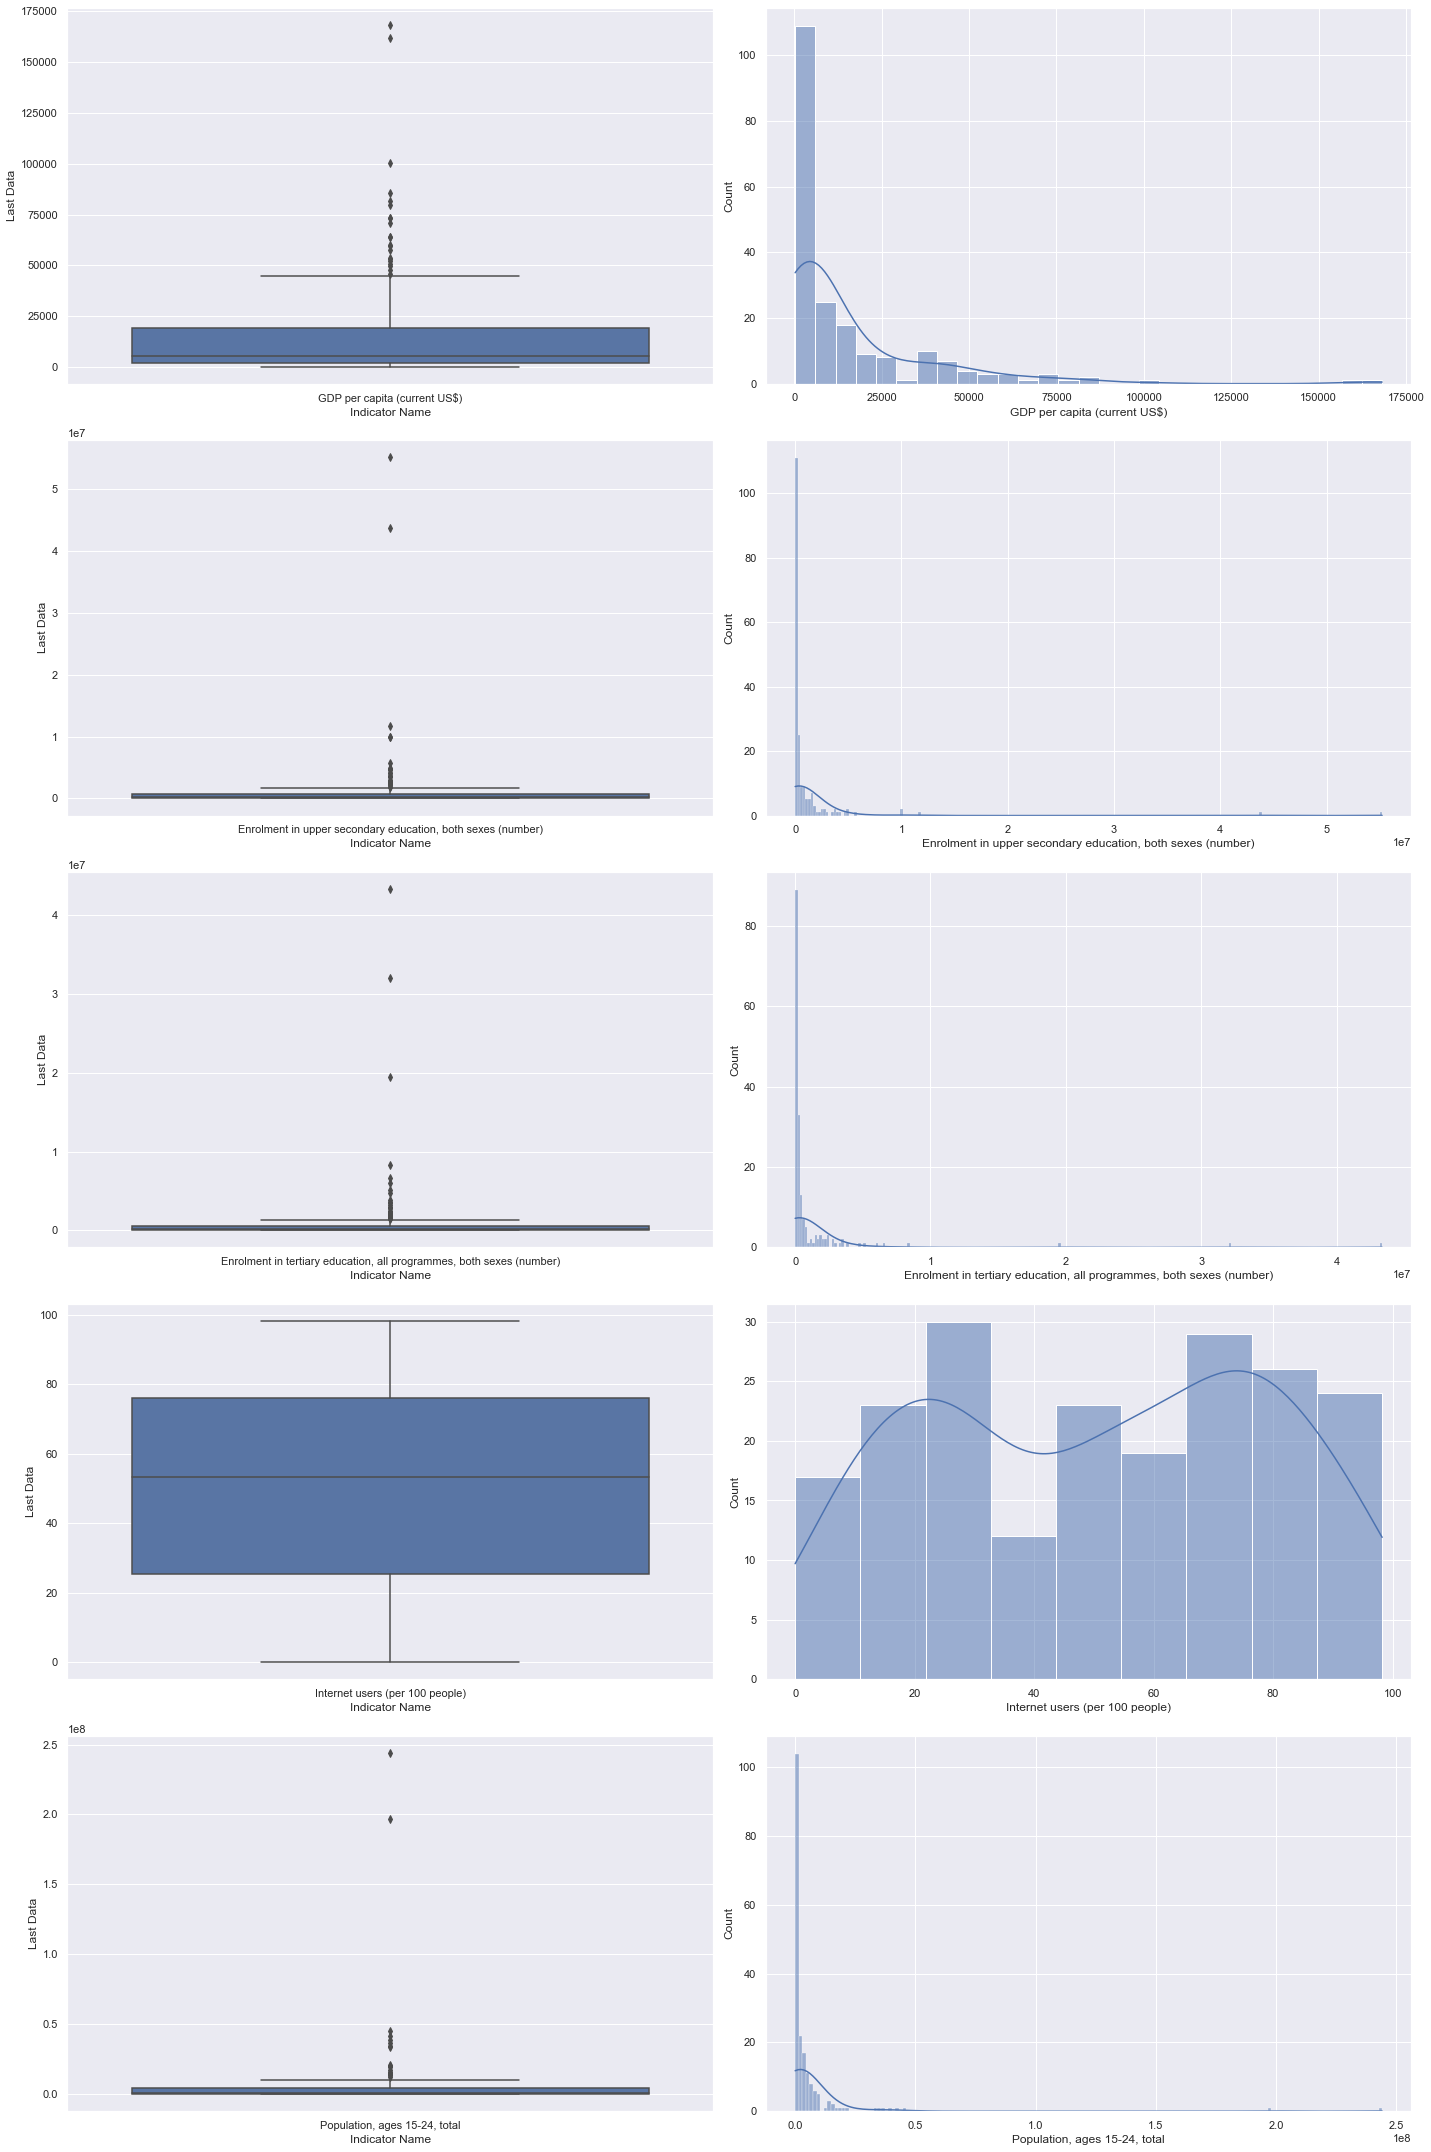

In [84]:
plt.figure(figsize = (20, 30))

# Indicateur Numérique

dfTemp = dfCountry[dfCountry["Indicator Name"] == 'Internet users (per 100 people)']
describeNum = dfTemp.describe()

plt.subplot(5,2,7)
sns.boxplot(x = dfTemp["Indicator Name"], y = dfTemp["Last Data"], data = dfTemp)

plt.subplot(5,2,8)
sns.histplot(dfTemp["Last Data"], kde = True)
plt.xlabel('Internet users (per 100 people)')

# Indicateur économique

dfTemp = dfCountry[dfCountry["Indicator Name"] == 'GDP per capita (current US$)']
describeEco = dfTemp.describe()

plt.subplot(5,2,1)
sns.boxplot(x = dfTemp["Indicator Name"], y = dfTemp["Last Data"], data = dfTemp)

plt.subplot(5,2,2)
sns.histplot(dfTemp["Last Data"], kde = True)
plt.xlabel('GDP per capita (current US$)')

# Indicateur scolaire lycée

dfTemp = dfCountry[dfCountry["Indicator Name"] == 'Enrolment in upper secondary education, both sexes (number)']
describeSecondary = dfTemp.describe()

plt.subplot(5,2,3)
sns.boxplot(x = dfTemp["Indicator Name"], y = dfTemp["Last Data"], data = dfTemp)

plt.subplot(5,2,4)
sns.histplot(dfTemp["Last Data"], kde = True)
plt.xlabel('Enrolment in upper secondary education, both sexes (number)')


# Indicateur universitaire

dfTemp = dfCountry[dfCountry["Indicator Name"] == 'Enrolment in tertiary education, all programmes, both sexes (number)']
describeUniv = dfTemp.describe()

plt.subplot(5,2,5)
sns.boxplot(x = dfTemp["Indicator Name"], y = dfTemp["Last Data"], data = dfTemp)

plt.subplot(5,2,6)
sns.histplot(dfTemp["Last Data"], kde = True)
plt.xlabel('Enrolment in tertiary education, all programmes, both sexes (number)')


# Indicateur démographique, population 15-24

dfTemp = dfCountry[dfCountry["Indicator Name"] == 'Population, ages 15-24, total']
describeDemo = dfTemp.describe()

plt.subplot(5,2,9)
sns.boxplot(x = dfTemp["Indicator Name"], y = dfTemp["Last Data"], data = dfTemp)

plt.subplot(5,2,10)
sns.histplot(dfTemp["Last Data"], kde = True)
plt.xlabel('Population, ages 15-24, total')


# Indicateur chômage

#dfTemp = dfCountry[dfCountry["Indicator Name"] == 'Unemployment, total (% of total labor force)']

#plt.subplot(5,3,1)
#sns.boxplot(x = dfTemp["Indicator Name"], y = dfTemp["Last Data"], data = dfTemp)

#plt.subplot(5,3,2)
#sns.histplot(dfTemp["Last Data"], kde = True)
#plt.xlabel('Unemployment, total (% of total labor force)')


plt.tight_layout()

In [85]:
# On observe plusieurs deux groupes importants sur la variable internet, l'un autour de 30% et l'autre autour de 70%
# Forte présence d'outliers sur tout les autres graphiques

In [86]:
describeDemo

,Last Data
count,191.00
mean,6307117.69
std,23446250.77
min,2825.00
25%,298178.50
50%,1168307.00
75%,4604884.50
max,244120201.00


In [87]:
describeEco

,Last Data
count,207.00
mean,16258.90
std,24660.44
min,285.73
25%,2031.76
50%,5602.55
75%,19165.79
max,168146.02


In [88]:
describeSecondary

,Last Data
count,195.00
mean,1265711.87
std,5208659.39
min,353.00
25%,36997.00
50%,179495.00
75%,738527.50
max,55228676.00


In [89]:
describeUniv

,Last Data
count,181.00
mean,1162480.52
std,4345269.88
min,194.00
25%,30771.00
50%,195469.00
75%,541653.00
max,43367392.00


In [90]:
describeNum

,Last Data
count,203.00
mean,51.05
std,28.54
min,0.00
25%,25.31
50%,53.23
75%,76.14
max,98.24


# Score d'attractivité


J'ai décidé de pondérer subjectivement les indicateurs selon ce qui me semble le plus pertinent :

| Type | Indicator Name | Pondération |
| --- | --- | --- |
| numérique | Internet Users | 4
| démographique |Population, ages 15-24 | 3 |
| économique | GDP per capita | 1 |
| éducatif | Enrolment in upper secondary education | 2 |
| éducatif | Enrolment in tertiary education | 3 |


In [91]:
# Création dataframe pour le score, pays en index, indicateurs en colonnes sur les données "Last Data"
dfScore = dfCountry.pivot_table(index=['Country Name'], columns="Indicator Name")['Last Data']

In [92]:
# On enlève les indicateurs qui ne nous intéressent pas
dfScore.drop(dfScore.columns[[4, 6, 7]], axis=1, inplace=True)

Vu que les indicateurs ont des échelles et des unités très différentes, la moyenne de la démographie est de 6307117.69 alors que celle de l'indicateur numérique est de 51.05%, nous allons procéder à la normalisation des données avec StandardScaler

In [93]:
scaler = StandardScaler()
scaledDf = scaler.fit_transform(dfScore)
scaledDf = pd.DataFrame(scaledDf)
scaledDf = scaledDf.rename(columns={0 : "Enrolment in tertiary education, all programmes, both sexes", 
                                    1: "Enrolment in upper secondary education, both sexes", 
                                   2: "GDP per capita (current US$)",
                                   3: "Internet users",
                                   4: "Population, ages 15-24"})
scaledDf['Country Name'] = dfScore.index


In [94]:
scaledDf['Score'] = [row[0] * 2 + row[1] * 2 + row[2] * 1 + row[3] * 5 + row[4] * 3 for row in zip(scaledDf['Enrolment in tertiary education, all programmes, both sexes'],
           scaledDf['Enrolment in upper secondary education, both sexes'],
           scaledDf['GDP per capita (current US$)'],
           scaledDf['Internet users'],
           scaledDf['Population, ages 15-24'])]

## Classement des pays à fort potentiel.

In [95]:
scaledDf.sort_values(by='Score', ascending=False).head(20)

,"Enrolment in tertiary education, all programmes, both sexes","Enrolment in upper secondary education, both sexes",GDP per capita (current US$),Internet users,"Population, ages 15-24",Country Name,Score
86,7.14,10.39,-0.59,-0.76,10.17,India,61.20
40,9.74,8.17,-0.33,0.08,8.16,China,60.33
203,4.24,2.02,1.68,0.88,1.66,United States,23.59
26,1.64,1.67,-0.31,0.30,1.17,Brazil,11.34
95,0.62,0.47,0.92,1.44,0.25,Japan,11.04
202,0.27,0.56,0.98,1.54,0.06,United Kingdom,10.52
113,-0.27,-0.24,3.43,1.63,-0.27,Luxembourg,9.77
71,0.42,0.25,1.05,1.36,0.10,Germany,9.48
21,-0.27,-0.24,2.82,1.65,-0.27,Bermuda,9.24
101,0.49,0.12,0.46,1.46,0.01,"Korea, Rep.",9.01


L'inde et la Chine semblent surestimés à cause de leur poids démographique. Surtout l'Inde qui a un mauvais score internet. Vient ensuite les Etats-Unis, le Brésil puis les pays développé d'Asie (Japon et Corée du sud) avec les pays européens les plus importants

## Score d'attractivité par région

In [96]:
# Création du dataframe pour la visualisation des scores par région
mergeRegion = pd.DataFrame({'Country Name': dfCountry['Country Name'],
                           'Region': dfCountry['Region'],
                           'Income Group': dfCountry['Income Group']})

In [97]:
# Jointure
scaleRegionDf = pd.merge(scaledDf, mergeRegion, left_on='Country Name', right_on='Country Name', how='inner')
scaleRegionDf.drop_duplicates(inplace=True)

# Groupement par Region
scoreRegion = scaleRegionDf.groupby('Region').mean()
scoreRegion = scoreRegion.rename(columns = {"Enrolment in tertiary education, all programmes, both sexes": 'sup',
                             "Enrolment in upper secondary education, both sexes": 'lyc',
                             "GDP per capita (current US$)": 'eco',
                             'Internet users': 'num',
                             "Population, ages 15-24": "pop"})
scoreRegion.sort_values(by="Score", ascending=False, inplace=True)

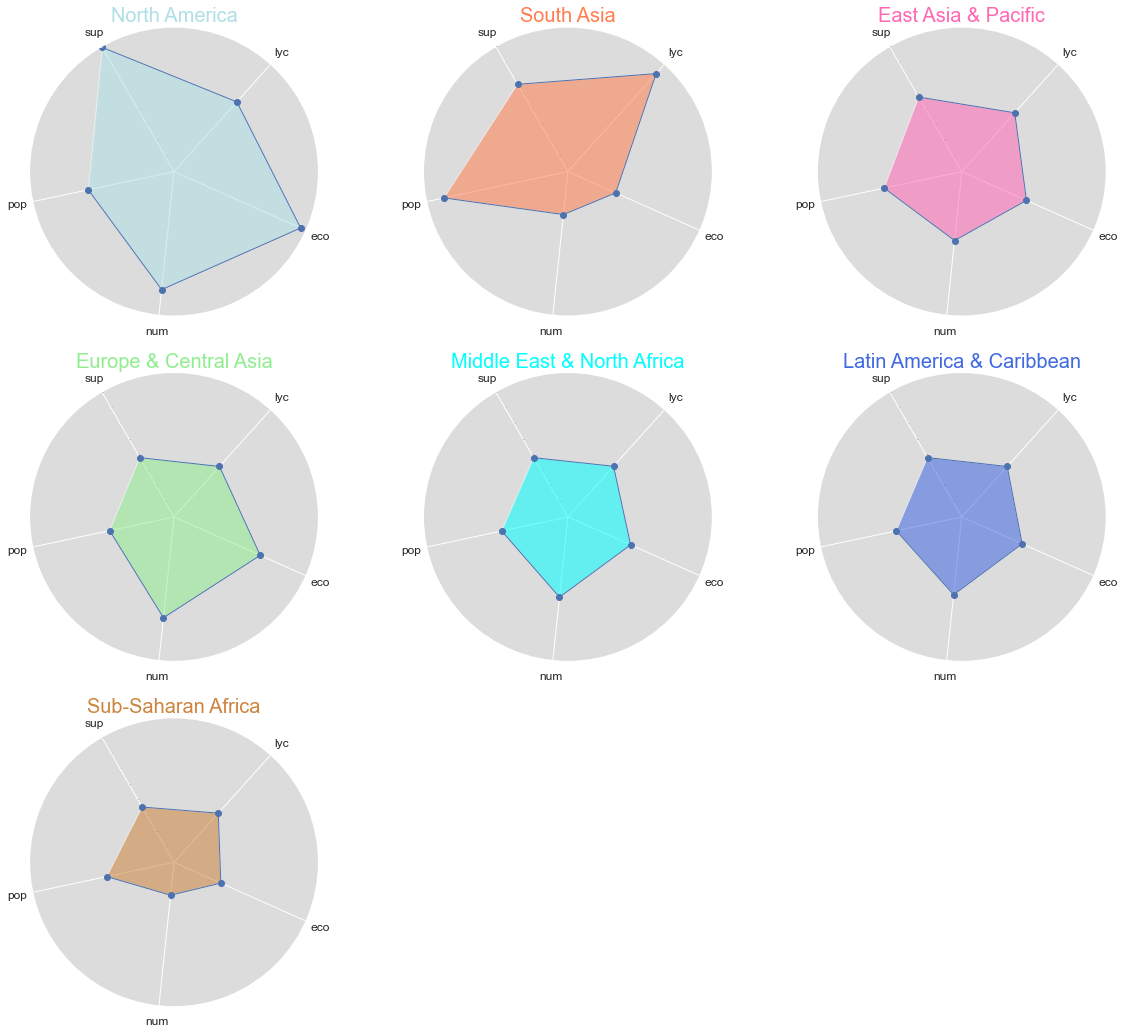

In [98]:
df_plot = scoreRegion[['sup','lyc', 'eco','num','pop']]

plt.rc('axes', facecolor = 'Gainsboro')

# number of variable
categories=list(df_plot.columns)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,18))
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

Plus l'aire dans le graphique est grande, plus la région est intéressante pour l'entreprise

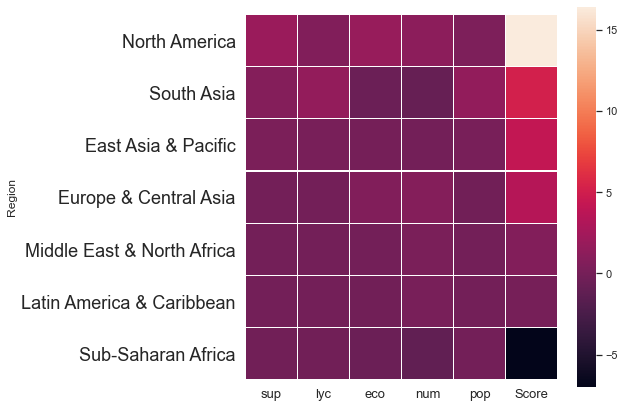

In [99]:
fig = plt.figure(1, figsize=(7, 7))
res = sns.heatmap(scoreRegion, square=True, linewidths=0.1)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 13)

plt.show()

La région Amérique du Nord se distingue fortement. Ce n'est pas très étonnant étant donné le score des États-Unis. Il y'a ensuite l'Asie qui est porté par les scores très importants de la Chine et de l'Inde. Nous avons ensuite l'Europe.

In [100]:
scoreIncome = scaleRegionDf.groupby('Income Group').mean()
scoreIncome = scoreIncome.rename(columns = {"Enrolment in tertiary education, all programmes, both sexes": 'sup',
                             "Enrolment in upper secondary education, both sexes": 'lyc',
                             "GDP per capita (current US$)": 'eco',
                             'Internet users': 'num',
                             "Population, ages 15-24": "pop"})
scoreIncome.sort_values(by="Score", ascending=False, inplace=True)

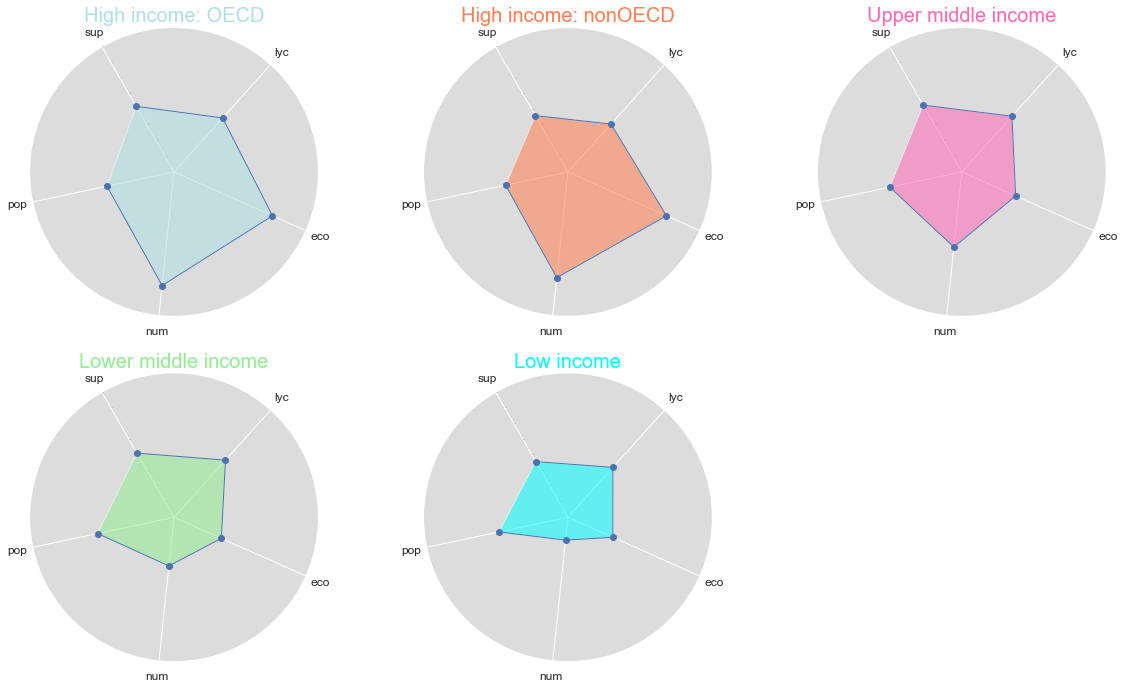

In [101]:
df_plot = scoreIncome[['sup','lyc', 'eco','num','pop']]


# number of variable
categories=list(df_plot.columns)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,18))
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

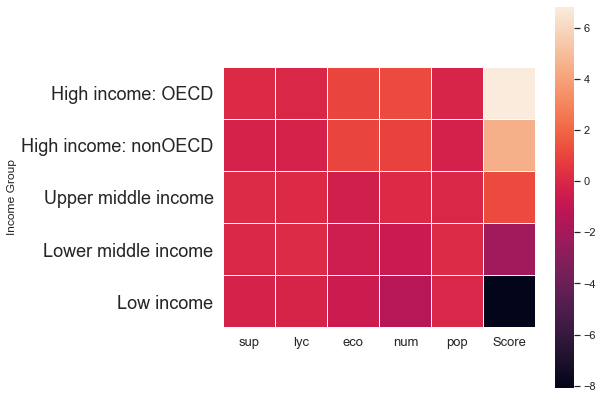

In [102]:
fig = plt.figure(1, figsize=(7, 7))
res = sns.heatmap(scoreIncome, square=True, linewidths=0.1)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 13)

plt.show()

Sans grande surprise, on remarque que les scores selon les groupes de revenus se classent du plus riche au moins riche.

## Conlusion

Il s'avère que les pays qui ressortent sont les pays à très grosses populations (l'Inde, la Chine, le Brésil). C'est possible que ce soit lié à un problème de pondération. Il vient ensuite les pays développés à travers le monde comme les États-Unis qui sont tout en haut de la liste, le Japon ou l'ensemble des pays dits riches de l'Europe (France, RU, Norvège). C'est assez intuitif de voir ces pays en hauts de la liste.

Il peut être intéressant d'explorer les marchés de l'Inde et de la Chine qui semblent prometteurs par la taille importante de la population estudiantine qui pourrait vouloir un diplôme européen.

# Prédictions

Utilisation des données de prédictions de EdStatsData.csv

Inde, Chine et brésil faire un ciblage précis sur un type de population
évolution d'indicateurs de la population

In [126]:
# Données de prédictions disponibles pour les pays de notre top 10 pour les années 2025-2050, avec nos indicateurs retenus
dfPred = data.copy()
dfPred = dfPred[['Country Name', 'Indicator Name', '2025','2030','2035','2040','2045','2050']]
indics = ['Internet users (per 100 people)', 
             'GDP per capita (current US$)',
             'Population, total',
             'Population growth (annual %)',
             'Population, ages 15-24, total',
             'Enrolment in upper secondary education, both sexes (number)',
             'Enrolment in tertiary education, all programmes, both sexes (number)',                          
            ]
# 10 premiers pays sans les Bermudes qui sont trop petits
countries = ['India', 'China', 'United States', 'Brazil', 'Japan', 'United Kingdom', 'Luxembourg', 'Germany', 'Korea, Rep.', 'Norway']
maskedPred = dfPred["Indicator Name"].isin(indics)
maskCountries = dfPred["Country Name"].isin(countries)
# Dataframe avec les masques appliqués
dfPred = dfPred[maskedPred][maskCountries]

<ipython-input-126-939c8aea0c1a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfPred = dfPred[maskedPred][maskCountries]


<AxesSubplot:>

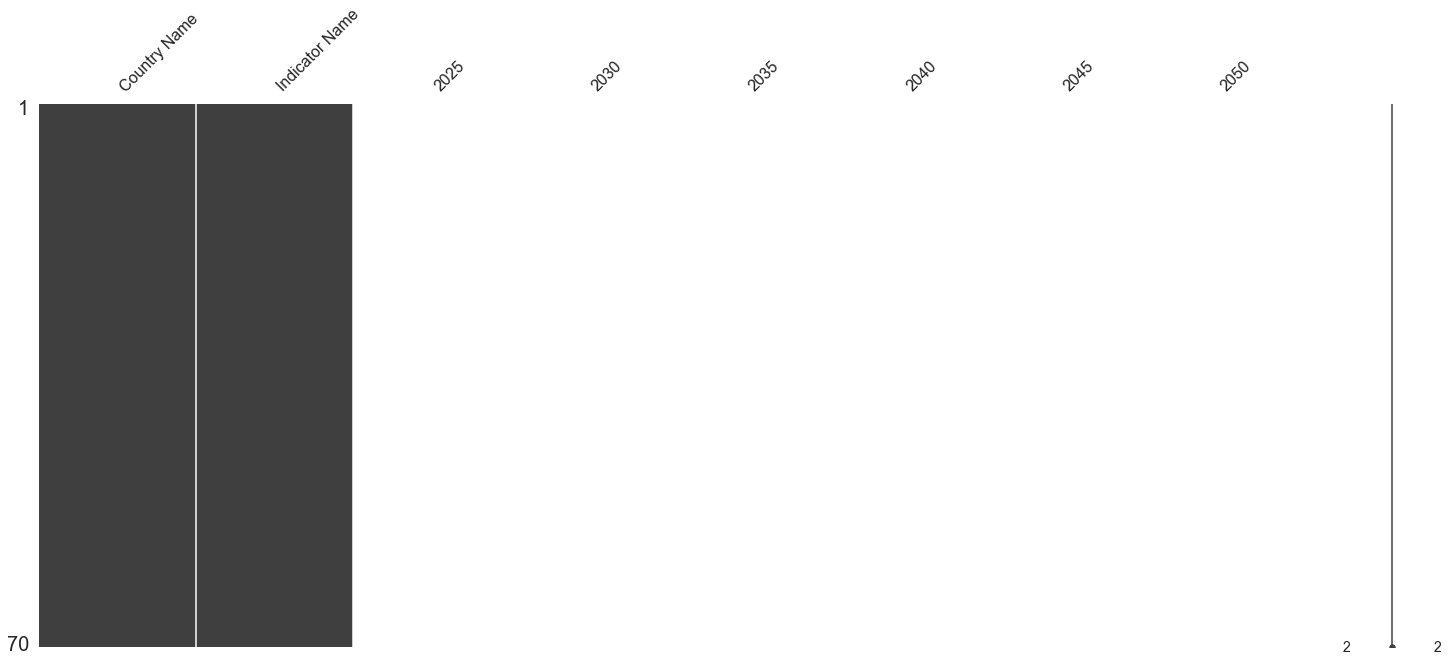

In [123]:
msno.matrix(dfPred)

Il n'y a pas de données prédictives de nos indicateurs retenus pour les pays du top 10

In [192]:
# Projection de la population mondiale par les Nations Unis.
UNPopProjection = pd.read_csv("data-cWOQz.csv")

In [195]:
UNPopProjection.head(4)

,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,1186178280,4393296010,738442070,634386570,357838040,39331130
1,1340103340,4598426260,739725260,666502060,371268610,42131270
2,1504213340,4774708300,738089840,695584400,384273720,44791400
3,1679301150,4922829660,733929350,721066520,396278130,47361250


In [194]:
# On enlève la colonne "Region" qui comporte les années pour calculer le taux d'évolution
UNPopProjection = UNPopProjection.drop(["Region"], axis = 1)
# Taux d'évolution en pourcentage pour les années 2015 - 2030
UNPopProjection.pct_change(periods=3).head(4)

,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan
3,0.42,0.12,-0.01,0.14,0.11,0.20


On peut voir ici que les projections des populations européennes sont stagnantes, voir descendantes et on sait que la population subit un vieillissement. Les estimations pour l'amérique du nord m'ont surpris, mais elles sont proches des estimations faites par les Etats Unis (https://www.census.gov/content/dam/Census/library/publications/2020/demo/p25-1144.pdf, page 4).
Je peux conseiller de se diriger dans les pays d'Amérique du Nord comme les USA et le Canada qui disposent d'une forte connectivité internet et d'une bonne croissance démographique prévisionnelle. Ou alors de se diriger vers les pays d'Afrique ou d'Asie comme l'Inde et la Chine qui sont premiers dans le scoring pour profiter d'une évolution démographique extrèmement forte et cela malgré une connexion numérique moindre que l'Amérique du Nord.
